Acknowledgement: This code was initially inspired by the lab "COMP34212_Lab2b_Keras_CNN_CIFAR_2025" before undergoing significant changes.

# Setup

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import utils
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout, SpatialDropout2D
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Input, Add
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.callbacks import Callback, LearningRateScheduler, ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import backend as K


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

print('Libraries imported.')

Libraries imported.


# Data Preperation

In [ ]:



cifar100_fine_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

cifar100_coarse_labels = [
    'aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables',
    'household electrical devices', 'household furniture', 'insects', 'large carnivores',
    'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores',
    'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals',
    'trees', 'vehicles 1', 'vehicles 2'
]


fine_to_coarse_mapping = {
    0: 4, 1: 1, 2: 14, 3: 8, 4: 0, 5: 6, 6: 7, 7: 7,
    8: 18, 9: 3, 10: 3, 11: 14, 12: 9, 13: 18, 14: 7, 15: 11,
    16: 3, 17: 9, 18: 7, 19: 11, 20: 6, 21: 11, 22: 5, 23: 10,
    24: 7, 25: 6, 26: 13, 27: 15, 28: 3, 29: 15, 30: 0, 31: 11,
    32: 1, 33: 10, 34: 12, 35: 14, 36: 16, 37: 9, 38: 11, 39: 5,
    40: 5, 41: 19, 42: 8, 43: 8, 44: 15, 45: 13, 46: 14, 47: 17,
    48: 18, 49: 10, 50: 16, 51: 4, 52: 17, 53: 4, 54: 2, 55: 0,
    56: 17, 57: 4, 58: 18, 59: 17, 60: 10, 61: 3, 62: 2, 63: 12,
    64: 12, 65: 16, 66: 12, 67: 1, 68: 9, 69: 19, 70: 2, 71: 10,
    72: 0, 73: 1, 74: 16, 75: 12, 76: 9, 77: 13, 78: 15, 79: 13,
    80: 16, 81: 18, 82: 2, 83: 4, 84: 6, 85: 19, 86: 5, 87: 5,
    88: 8, 89: 19, 90: 18, 91: 1, 92: 2, 93: 15, 94: 6, 95: 0,
    96: 17, 97: 8, 98: 14, 99: 13
}

In [ ]:

BATCH_SIZE = 256
N_EPOCH = 75
N_CLASSES = 100
N_SUPERCLASSES = 20
VERBOSE = 1
VALIDATION_SPLIT = 0.2

print('Main variables initialised.')


IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')


Main variables initialised.
Image variables initialisation


In [ ]:

(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar100.load_data(label_mode='fine')
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')


output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES)


input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255


input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Sample input image class: apple


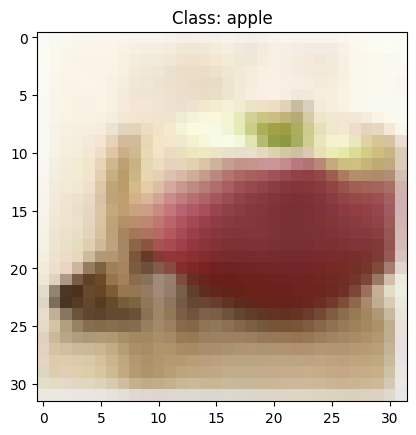

Sample input image class: boy


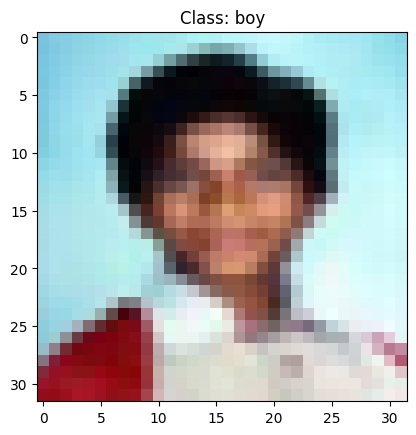

In [ ]:

Selected_Image = 2
image = input_X_train[Selected_Image]
print("Sample input image class:", cifar100_fine_labels[output_y_train[Selected_Image][0]])
plt.imshow(image)
plt.title(f"Class: {cifar100_fine_labels[output_y_train[Selected_Image][0]]}")
plt.show()

Selected_Image = 3
image = input_X_train[Selected_Image]
print("Sample input image class:", cifar100_fine_labels[output_y_train[Selected_Image][0]])
plt.imshow(image)
plt.title(f"Class: {cifar100_fine_labels[output_y_train[Selected_Image][0]]}")
plt.show()

# Training

In [ ]:
def identity_block(x, filters, dropout_rate):
    x_skip = x


    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization(momentum=0.9)(x)
    x = Activation('relu')(x)


    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization(momentum=0.9)(x)
    x = Dropout(dropout_rate)(x)


    x = Add()([x, x_skip])
    x = Activation('relu')(x)
    return x


In [ ]:
def conv_block(x, filters, stride, dropout_rate):
    x_skip = x


    x = Conv2D(filters, 3, strides=stride, padding='same')(x)
    x = BatchNormalization(momentum=0.9)(x)
    x = Activation('relu')(x)


    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization(momentum=0.9)(x)
    x = Dropout(dropout_rate)(x)


    x_skip = Conv2D(filters, 1, strides=stride, padding='same')(x_skip)
    x_skip = BatchNormalization(momentum=0.9)(x_skip)

    x = Add()([x, x_skip])
    x = Activation('relu')(x)
    return x


In [ ]:

inputs = Input(shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS))


x = Conv2D(64, 3, strides=1, padding='same')(inputs)
x = BatchNormalization(momentum=0.9)(x)
x = Activation('relu')(x)




x = conv_block(x, 64, stride=1, dropout_rate=0.3)
x = identity_block(x, 64, dropout_rate=0.3)


x = conv_block(x, 128, stride=2, dropout_rate=0.3)
x = identity_block(x, 128, dropout_rate=0.3)


x = conv_block(x, 256, stride=2, dropout_rate=0.3)
x = identity_block(x, 256, dropout_rate=0.3)


x = Dropout(0.2)(x)
x = GlobalAveragePooling2D()(x)
outputs = Dense(N_CLASSES, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
class TrainingMonitor(Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = K.get_value(self.model.optimizer.learning_rate)
        print(f"\nEpoch {epoch+1}")
        print(f"LR: {lr:.1e}\n")
        print(f"  Training Loss: {logs['loss']:.4f} - Training Accuracy: {logs['accuracy']:.4f}")
        print(f"  Validation Loss: {logs['val_loss']:.4f} - Validation Accuracy: {logs['val_accuracy']:.4f}")
        if logs['accuracy'] - logs['val_accuracy'] > 0.15:
            print(f"! Overfitting: {logs['accuracy']-logs['val_accuracy']:.4f} gap")



In [ ]:

OPTIM1 = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=OPTIM1, metrics=['accuracy'])

model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_64 (Conv2D)        │ (None, 32, 32, 64)     │          1,792 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_64    │ (None, 32, 32, 64)     │            256 │ conv2d_64[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_52             │ (None, 32, 32, 64)     │              0 │ batch_normalization_6… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_65 (Conv2D)        │ (None, 32, 32, 64)     │         36,928 │ activation_52[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_65    │ (None, 32, 32, 64)     │            256 │ conv2d_65[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_53             │ (None, 32, 32, 64)     │              0 │ batch_normalization_6… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_66 (Conv2D)        │ (None, 32, 32, 64)     │         36,928 │ activation_53[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_66    │ (None, 32, 32, 64)     │            256 │ conv2d_66[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_67 (Conv2D)        │ (None, 32, 32, 64)     │          4,160 │ activation_52[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_28 (Dropout)      │ (None, 32, 32, 64)     │              0 │ batch_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_67    │ (None, 32, 32, 64)     │            256 │ conv2d_67[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_24 (Add)              │ (None, 32, 32, 64)     │              0 │ dropout_28[0][0],      │
│                           │                        │                │ batch_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_54             │ (None, 32, 32, 64)     │              0 │ add_24[0][0]           │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_68 (Conv2D)        │ (None, 32, 32, 64)     │         36,928 │ activation_54[0][0]    │
├──────────────────────

 Total params: 2,811,940 (10.73 MB)

 Trainable params: 2,807,332 (10.71 MB)

 Non-trainable params: 4,608 (18.00 KB)

In [ ]:

early_stop = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=8,
    restore_best_weights=True,
    start_from_epoch=10
)

In [ ]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.2,
    patience=6,
    min_lr=1e-4,
    mode='max',
    cooldown=2,
    verbose=1
)

In [ ]:

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

In [ ]:
history = model.fit(
    input_X_train, output_Y_train,
    batch_size=BATCH_SIZE,
    epochs=N_EPOCH,
    validation_split=VALIDATION_SPLIT,
    verbose=VERBOSE,
    callbacks=[
        early_stop,
        checkpoint,
        TrainingMonitor(),
        reduce_lr,
    ]
)


Epoch 1/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.0716 - loss: 4.2236
Epoch 1: val_accuracy improved from -inf to 0.09590, saving model to best_model.h5



Epoch 1
LR: 1.0e-03

  Training Loss: 3.8404 - Training Accuracy: 0.1140
  Validation Loss: 4.4855 - Validation Accuracy: 0.0959
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 96ms/step - accuracy: 0.0719 - loss: 4.2211 - val_accuracy: 0.0959 - val_loss: 4.4855 - learning_rate: 0.0010
Epoch 2/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2112 - loss: 3.2009
Epoch 2: val_accuracy improved from 0.09590 to 0.12590, saving model to best_model.h5



Epoch 2
LR: 1.0e-03

  Training Loss: 3.0604 - Training Accuracy: 0.2349
  Validation Loss: 4.0688 - Validation Accuracy: 0.1259
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.2117 - loss: 3.1982 - val_accuracy: 0.1259 - val_loss: 4.0688 - learning_rate: 0.0010
Epoch 3/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3060 - loss: 2.6871
Epoch 3: val_accuracy improved from 0.12590 to 0.24590, saving model to best_model.h5



Epoch 3
LR: 1.0e-03

  Training Loss: 2.5950 - Training Accuracy: 0.3259
  Validation Loss: 3.1374 - Validation Accuracy: 0.2459
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.3063 - loss: 2.6853 - val_accuracy: 0.2459 - val_loss: 3.1374 - learning_rate: 0.0010
Epoch 4/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3912 - loss: 2.3022
Epoch 4: val_accuracy did not improve from 0.24590

Epoch 4
LR: 1.0e-03

  Training Loss: 2.2566 - Training Accuracy: 0.3985
  Validation Loss: 3.9112 - Validation Accuracy: 0.2082
! Overfitting: 0.1903 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.3914 - loss: 2.3014 - val_accuracy: 0.2082 - val_loss: 3.9112 - learning_rate: 0.0010
Epoch 5/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4444 - loss: 2.0511
Epoch 5: val_accuracy did not improve from 0.24590

Epoch 5
LR: 1.0e-03

  Training Loss: 2.0086 - Training Accuracy: 0.4542
  Validation Loss: 3.8181 - Validation Accuracy: 0.2281
! Overfitting: 0.2261 ga


Epoch 7
LR: 1.0e-03

  Training Loss: 1.6675 - Training Accuracy: 0.5336
  Validation Loss: 2.9722 - Validation Accuracy: 0.3350
! Overfitting: 0.1986 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.5307 - loss: 1.6925 - val_accuracy: 0.3350 - val_loss: 2.9722 - learning_rate: 0.0010
Epoch 8/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5659 - loss: 1.5232
Epoch 8: val_accuracy did not improve from 0.33500

Epoch 8
LR: 1.0e-03

  Training Loss: 1.5272 - Training Accuracy: 0.5655
  Validation Loss: 3.3101 - Validation Accuracy: 0.2834
! Overfitting: 0.2821 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.5659 - loss: 1.5233 - val_accuracy: 0.2834 - val_loss: 3.3101 - learning_rate: 0.0010
Epoch 9/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5953 - loss: 1.4056
Epoch 9: val_accuracy improved from 0.33500 to 0.35030, saving model to best_model.h5



Epoch 9
LR: 1.0e-03

  Training Loss: 1.4089 - Training Accuracy: 0.5960
  Validation Loss: 2.9568 - Validation Accuracy: 0.3503
! Overfitting: 0.2457 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.5953 - loss: 1.4057 - val_accuracy: 0.3503 - val_loss: 2.9568 - learning_rate: 0.0010
Epoch 10/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6254 - loss: 1.3002
Epoch 10: val_accuracy did not improve from 0.35030

Epoch 10
LR: 1.0e-03

  Training Loss: 1.2994 - Training Accuracy: 0.6262
  Validation Loss: 3.3086 - Validation Accuracy: 0.3117
! Overfitting: 0.3145 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.6254 - loss: 1.3002 - val_accuracy: 0.3117 - val_loss: 3.3086 - learning_rate: 0.0010
Epoch 11/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6567 - loss: 1.1853
Epoch 11: val_accuracy improved from 0.35030 to 0.41250, saving model to best_model.h5



Epoch 11
LR: 1.0e-03

  Training Loss: 1.1910 - Training Accuracy: 0.6526
  Validation Loss: 2.4594 - Validation Accuracy: 0.4125
! Overfitting: 0.2401 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.6566 - loss: 1.1854 - val_accuracy: 0.4125 - val_loss: 2.4594 - learning_rate: 0.0010
Epoch 12/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6783 - loss: 1.0979
Epoch 12: val_accuracy did not improve from 0.41250

Epoch 12
LR: 1.0e-03

  Training Loss: 1.1035 - Training Accuracy: 0.6756
  Validation Loss: 2.7134 - Validation Accuracy: 0.3843
! Overfitting: 0.2913 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.6783 - loss: 1.0979 - val_accuracy: 0.3843 - val_loss: 2.7134 - learning_rate: 0.0010
Epoch 13/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7087 - loss: 0.9940
Epoch 13: val_accuracy did not improve from 0.41250

Epoch 13
LR: 1.0e-03

  Training Loss: 1.0060 - Training Accuracy: 0.7017
  Validation Loss: 3.1088 - Validation Accuracy


Epoch 14
LR: 1.0e-03

  Training Loss: 0.9281 - Training Accuracy: 0.7211
  Validation Loss: 2.2579 - Validation Accuracy: 0.4700
! Overfitting: 0.2511 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7266 - loss: 0.9162 - val_accuracy: 0.4700 - val_loss: 2.2579 - learning_rate: 0.0010
Epoch 15/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7499 - loss: 0.8321
Epoch 15: val_accuracy did not improve from 0.47000

Epoch 15
LR: 1.0e-03

  Training Loss: 0.8497 - Training Accuracy: 0.7441
  Validation Loss: 2.4319 - Validation Accuracy: 0.4364
! Overfitting: 0.3077 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.7498 - loss: 0.8325 - val_accuracy: 0.4364 - val_loss: 2.4319 - learning_rate: 0.0010
Epoch 16/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7679 - loss: 0.7634
Epoch 16: val_accuracy improved from 0.47000 to 0.50140, saving model to best_model.h5



Epoch 16
LR: 1.0e-03

  Training Loss: 0.7756 - Training Accuracy: 0.7642
  Validation Loss: 2.1529 - Validation Accuracy: 0.5014
! Overfitting: 0.2628 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.7678 - loss: 0.7636 - val_accuracy: 0.5014 - val_loss: 2.1529 - learning_rate: 0.0010
Epoch 17/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7920 - loss: 0.6805
Epoch 17: val_accuracy did not improve from 0.50140

Epoch 17
LR: 1.0e-03

  Training Loss: 0.7058 - Training Accuracy: 0.7832
  Validation Loss: 2.5103 - Validation Accuracy: 0.4511
! Overfitting: 0.3321 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.7918 - loss: 0.6810 - val_accuracy: 0.4511 - val_loss: 2.5103 - learning_rate: 0.0010
Epoch 18/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8077 - loss: 0.6285
Epoch 18: val_accuracy did not improve from 0.50140

Epoch 18
LR: 1.0e-03

  Training Loss: 0.6388 - Training Accuracy: 0.8050
  Validation Loss: 2.5434 - Validation Accuracy


Epoch 19
LR: 1.0e-03

  Training Loss: 0.5791 - Training Accuracy: 0.8206
  Validation Loss: 1.9153 - Validation Accuracy: 0.5345
! Overfitting: 0.2861 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8248 - loss: 0.5656 - val_accuracy: 0.5345 - val_loss: 1.9153 - learning_rate: 0.0010
Epoch 20/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8453 - loss: 0.5025
Epoch 20: val_accuracy did not improve from 0.53450

Epoch 20
LR: 1.0e-03

  Training Loss: 0.5201 - Training Accuracy: 0.8390
  Validation Loss: 3.0410 - Validation Accuracy: 0.4237
! Overfitting: 0.4153 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8452 - loss: 0.5027 - val_accuracy: 0.4237 - val_loss: 3.0410 - learning_rate: 0.0010
Epoch 21/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8609 - loss: 0.4521
Epoch 21: val_accuracy did not improve from 0.53450

Epoch 21
LR: 1.0e-03

  Training Loss: 0.4683 - Training Accuracy: 0.8533
  Validation Loss: 2.6534 - Validation Accuracy


Epoch 26
LR: 2.0e-04

  Training Loss: 0.1446 - Training Accuracy: 0.9659
  Validation Loss: 1.5971 - Validation Accuracy: 0.6340
! Overfitting: 0.3319 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9554 - loss: 0.1756 - val_accuracy: 0.6340 - val_loss: 1.5971 - learning_rate: 2.0000e-04
Epoch 27/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9796 - loss: 0.1008
Epoch 27: val_accuracy did not improve from 0.63400

Epoch 27
LR: 2.0e-04

  Training Loss: 0.1012 - Training Accuracy: 0.9796
  Validation Loss: 1.6329 - Validation Accuracy: 0.6334
! Overfitting: 0.3462 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9796 - loss: 0.1008 - val_accuracy: 0.6334 - val_loss: 1.6329 - learning_rate: 2.0000e-04
Epoch 28/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9846 - loss: 0.0854
Epoch 28: val_accuracy did not improve from 0.63400

Epoch 28
LR: 2.0e-04

  Training Loss: 0.0864 - Training Accuracy: 0.9845
  Validation Loss: 1.6391 - Validation 


Epoch 29
LR: 2.0e-04

  Training Loss: 0.0757 - Training Accuracy: 0.9875
  Validation Loss: 1.6572 - Validation Accuracy: 0.6359
! Overfitting: 0.3515 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9878 - loss: 0.0740 - val_accuracy: 0.6359 - val_loss: 1.6572 - learning_rate: 2.0000e-04
Epoch 30/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9895 - loss: 0.0677
Epoch 30: val_accuracy did not improve from 0.63590

Epoch 30
LR: 2.0e-04

  Training Loss: 0.0683 - Training Accuracy: 0.9894
  Validation Loss: 1.7015 - Validation Accuracy: 0.6312
! Overfitting: 0.3582 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9895 - loss: 0.0677 - val_accuracy: 0.6312 - val_loss: 1.7015 - learning_rate: 2.0000e-04
Epoch 31/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9910 - loss: 0.0603
Epoch 31: val_accuracy did not improve from 0.63590

Epoch 31
LR: 2.0e-04

  Training Loss: 0.0605 - Training Accuracy: 0.9910
  Validation Loss: 1.6977 - Validation 


Epoch 32
LR: 2.0e-04

  Training Loss: 0.0561 - Training Accuracy: 0.9921
  Validation Loss: 1.7067 - Validation Accuracy: 0.6361
! Overfitting: 0.3560 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9931 - loss: 0.0542 - val_accuracy: 0.6361 - val_loss: 1.7067 - learning_rate: 2.0000e-04
Epoch 33/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9933 - loss: 0.0515
Epoch 33: val_accuracy improved from 0.63610 to 0.63820, saving model to best_model.h5



Epoch 33
LR: 2.0e-04

  Training Loss: 0.0515 - Training Accuracy: 0.9931
  Validation Loss: 1.7116 - Validation Accuracy: 0.6382
! Overfitting: 0.3550 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9933 - loss: 0.0515 - val_accuracy: 0.6382 - val_loss: 1.7116 - learning_rate: 2.0000e-04
Epoch 34/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9938 - loss: 0.0451
Epoch 34: val_accuracy did not improve from 0.63820

Epoch 34
LR: 2.0e-04

  Training Loss: 0.0469 - Training Accuracy: 0.9934
  Validation Loss: 1.7453 - Validation Accuracy: 0.6332
! Overfitting: 0.3602 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9938 - loss: 0.0452 - val_accuracy: 0.6332 - val_loss: 1.7453 - learning_rate: 2.0000e-04
Epoch 35/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9942 - loss: 0.0439
Epoch 35: val_accuracy did not improve from 0.63820

Epoch 35
LR: 2.0e-04

  Training Loss: 0.0452 - Training Accuracy: 0.9936
  Validation Loss: 1.7865 - Validation 


Epoch 40
LR: 1.0e-04

  Training Loss: 0.0284 - Training Accuracy: 0.9972
  Validation Loss: 1.8009 - Validation Accuracy: 0.6399
! Overfitting: 0.3573 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9973 - loss: 0.0287 - val_accuracy: 0.6399 - val_loss: 1.8009 - learning_rate: 1.0000e-04
Epoch 41/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9982 - loss: 0.0256
Epoch 41: val_accuracy did not improve from 0.63990

Epoch 41
LR: 1.0e-04

  Training Loss: 0.0254 - Training Accuracy: 0.9980
  Validation Loss: 1.7989 - Validation Accuracy: 0.6394
! Overfitting: 0.3586 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9982 - loss: 0.0256 - val_accuracy: 0.6394 - val_loss: 1.7989 - learning_rate: 1.0000e-04
Epoch 42/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9980 - loss: 0.0249
Epoch 42: val_accuracy improved from 0.63990 to 0.64050, saving model to best_model.h5



Epoch 42
LR: 1.0e-04

  Training Loss: 0.0251 - Training Accuracy: 0.9979
  Validation Loss: 1.8107 - Validation Accuracy: 0.6405
! Overfitting: 0.3574 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9980 - loss: 0.0249 - val_accuracy: 0.6405 - val_loss: 1.8107 - learning_rate: 1.0000e-04
Epoch 43/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9978 - loss: 0.0233
Epoch 43: val_accuracy did not improve from 0.64050

Epoch 43
LR: 1.0e-04

  Training Loss: 0.0232 - Training Accuracy: 0.9980
  Validation Loss: 1.8183 - Validation Accuracy: 0.6404
! Overfitting: 0.3576 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9978 - loss: 0.0233 - val_accuracy: 0.6404 - val_loss: 1.8183 - learning_rate: 1.0000e-04
Epoch 44/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9977 - loss: 0.0236
Epoch 44: val_accuracy improved from 0.64050 to 0.64370, saving model to best_model.h5



Epoch 44
LR: 1.0e-04

  Training Loss: 0.0229 - Training Accuracy: 0.9983
  Validation Loss: 1.8108 - Validation Accuracy: 0.6437
! Overfitting: 0.3546 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9977 - loss: 0.0236 - val_accuracy: 0.6437 - val_loss: 1.8108 - learning_rate: 1.0000e-04
Epoch 45/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9980 - loss: 0.0217
Epoch 45: val_accuracy did not improve from 0.64370

Epoch 45
LR: 1.0e-04

  Training Loss: 0.0225 - Training Accuracy: 0.9974
  Validation Loss: 1.8134 - Validation Accuracy: 0.6423
! Overfitting: 0.3551 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9980 - loss: 0.0217 - val_accuracy: 0.6423 - val_loss: 1.8134 - learning_rate: 1.0000e-04
Epoch 46/75
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9977 - loss: 0.0224
Epoch 46: val_accuracy did not improve from 0.64370

Epoch 46
LR: 1.0e-04

  Training Loss: 0.0222 - Training Accuracy: 0.9977
  Validation Loss: 1.8391 - Validation 


Epoch 48
LR: 1.0e-04

  Training Loss: 0.0202 - Training Accuracy: 0.9981
  Validation Loss: 1.8443 - Validation Accuracy: 0.6447
! Overfitting: 0.3535 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9984 - loss: 0.0199 - val_accuracy: 0.6447 - val_loss: 1.8443 - learning_rate: 1.0000e-04
Epoch 49/75
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9983 - loss: 0.0195
Epoch 49: val_accuracy did not improve from 0.64470

Epoch 49
LR: 1.0e-04

  Training Loss: 0.0200 - Training Accuracy: 0.9981
  Validation Loss: 1.8612 - Validation Accuracy: 0.6420
! Overfitting: 0.3561 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9983 - loss: 0.0196 - val_accuracy: 0.6420 - val_loss: 1.8612 - learning_rate: 1.0000e-04
Epoch 50/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9982 - loss: 0.0185
Epoch 50: val_accuracy did not improve from 0.64470

Epoch 50
LR: 1.0e-04

  Training Loss: 0.0185 - Training Accuracy: 0.9984
  Validation Loss: 1.8672 - Validation 

In [ ]:

predictions = model.predict(input_X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(output_Y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


## Evaluation

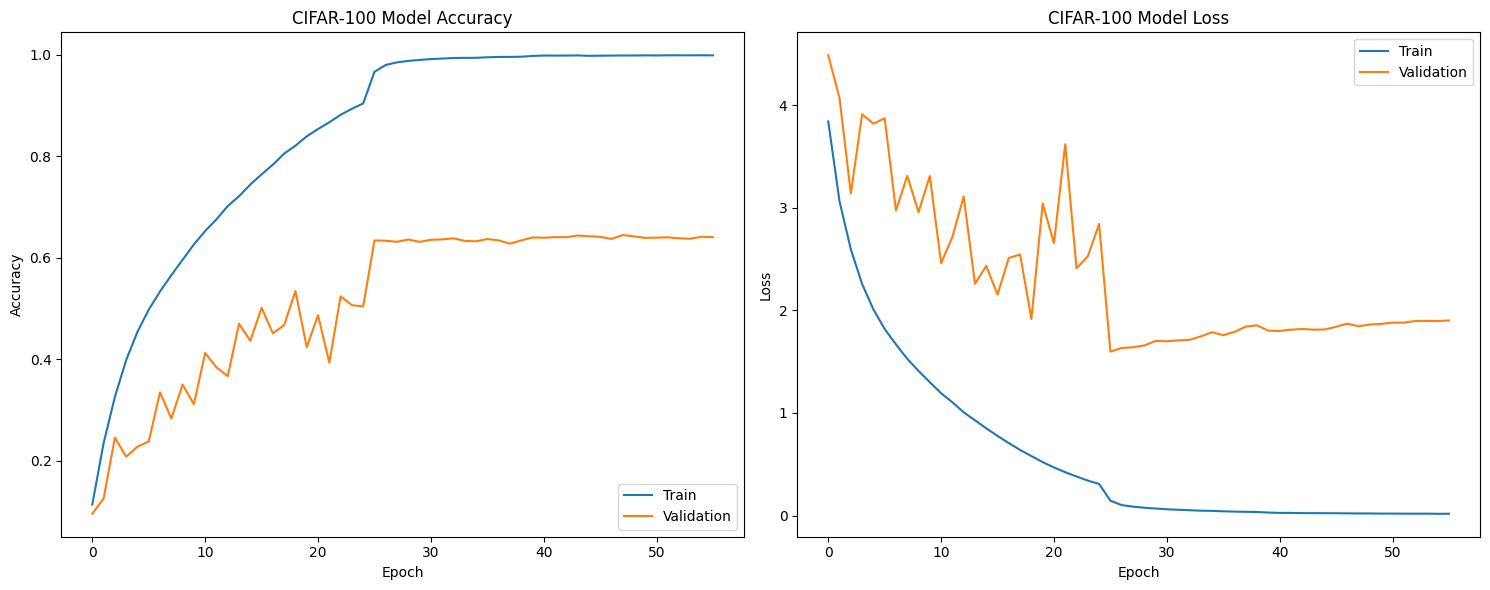

In [ ]:


plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CIFAR-100 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CIFAR-100 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:


test_loss, test_accuracy = model.evaluate(input_X_test, output_Y_test, verbose=VERBOSE)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


superclass_y_true = np.array([fine_to_coarse_mapping[y] for y in y_true])
superclass_y_pred = np.array([fine_to_coarse_mapping[y] for y in y_pred])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6539 - loss: 1.8272

Test Loss: 1.8177
Test Accuracy: 0.6515
